In [1]:
!pip install selenium beautifulsoup4 requests lxml #라이브러리 설치

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
import requests  #크롤링 해주는 라이브러리
from bs4 import BeautifulSoup
import re
from selenium import webdriver

In [5]:
path = "/usr/local/bin/chromedriver"
driver = webdriver.Chrome(path)

source_url = "https://namu.wiki/RecentChanges"
#requests.get 함수로 html 컨텐츠 가져올 수 있음
driver.get(source_url)
req = driver.page_source
#req = requests.get(source_url)   
#html = req.content

In [6]:
soup = BeautifulSoup(req,'html.parser')
#이 문장의 의미는 HTML 문서를 lxml 파서를 통해서 BeautifulSoup 객체로 만들어 준 것이다.
#따라서 soup은 해당 url의 모든 HTML 정보를 가지고 있게 된다.
#lxml은 String형식의 HTML문서를 살아있는 HTML문서, 의미있는 문서로 만들어주는 역할
contents_table = soup.find(name='table',attrs={'data-v-b517adde':''})
table_body = contents_table.find(name='tbody')
table_rows = table_body.find_all(name='tr')  #.find & .find_all 차이 비교


In [7]:
#print(contents_table)
#print(table_body)
print(table_rows)

[<tr data-v-b517adde=""><td data-v-b517adde=""><a data-v-b517adde="" href="/w/%EB%8F%85%EC%9D%BC%20%EC%97%B0%EB%B0%A9">독일 연방</a> <a data-v-b517adde="" href="/history/%EB%8F%85%EC%9D%BC%20%EC%97%B0%EB%B0%A9">[역사]</a> <a data-v-b517adde="" href="/diff/%EB%8F%85%EC%9D%BC%20%EC%97%B0%EB%B0%A9?rev=248&amp;oldrev=247">[비교]</a> <a data-v-b517adde="" href="/discuss/%EB%8F%85%EC%9D%BC%20%EC%97%B0%EB%B0%A9">[토론]</a> <span data-v-b517adde="">(<span class="GYAUPgG8" data-v-6cbb5b59="" data-v-b517adde="">+4</span>)</span></td> <td data-v-b517adde=""><div class="v-popover" data-v-b517adde="" data-v-cc6f4b5a=""><div aria-describedby="popover_x73ypgo00q" class="trigger" style="display:inline-block;"><a class="D20Hh1vY" data-v-cc6f4b5a="">rogerstark</a> </div> </div> <!-- --></td> <td data-v-b517adde=""><time data-v-b517adde="" datetime="2023-03-28T16:59:48.000Z">2023-03-29 01:59:48</time></td></tr>, <tr class="kd+K3R9K" data-v-b517adde=""><td data-v-b517adde=""><a data-v-b517adde="" href="/w/%EC%95%84

In [8]:
# a태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성합니다.
page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all("td")[0]
    td_url = first_td.find_all("a")
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get("href")
        if "png" not in page_url:
            page_urls.append(page_url)

# 중복 url을 제거합니다.
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

# 크롤링에 사용한 브라우저를 종료합니다.
#driver.close()

https://namu.wiki/w/%EB%8D%B0%EB%AF%B8%EC%95%88(%EB%AE%A4%EC%A7%80%EC%BB%AC)
https://namu.wiki/w/%EC%8B%9C%EC%98%A4(FIFTY%20FIFTY)
https://namu.wiki/w/%EC%B2%AD%EB%9F%89%EC%A4%91%ED%95%99%EA%B5%90(%EC%84%9C%EC%9A%B8)
https://namu.wiki/w/%EC%9D%B4%ED%86%A0%EC%8B%9C%20%EB%A6%B0
https://namu.wiki/w/%EC%9D%B4%EB%85%B8%EB%82%98%EC%B9%B4%20%EB%AE%A4%EC%A7%81


In [9]:
driver = webdriver.Chrome(path)  # for Mac
#driver = webdriver.Chrome(executable_path=excutable_path)  # for Windows
driver.get(page_urls[0])
req = driver.page_source
soup = BeautifulSoup(req, 'html.parser')
contents_table = soup.find(name="div", attrs={'class':'bPhwOZ49'})
title = contents_table.find_all('h1')[0]
category = contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name="div", attrs={"class":"e1WeYPVU"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)  #제목 정보
print("\n") 
print(category.text)
print("\n")
print(content_corpus)

# 크롤링에 사용한 브라우저를 종료합니다.
#driver.close()

데미안(뮤지컬) 


창작 뮤지컬2020년 극작품소설 원작 뮤지컬


제작사 둘러보기 틀 [ 펼치기 · 접기 ]컨텐츠원 제작 [ 펼치기 · 접기 ]201920202020낭만바리케이트 제작 [ 펼치기 · 접기 ]202120232023컨텐츠원 제작 [ 펼치기 · 접기 ]201920202020201920202020낭만바리케이트 제작 [ 펼치기 · 접기 ]202120232023202120232023데미안 Demian제작컨텐츠원 (2020) 낭만바리케이트 (2023)연출이대웅작•작사오세혁작곡다미로공연장초연: 유니플렉스 2관재연: 드림아트센터 3관공연 기간초연: 2020.03.07 ~ 2020.04.26재연: 2023.01.15 ~ 2023.03.26관람 시간90분공식 계정1. 개요2. 시놉시스3. 등장인물4. 줄거리5. 넘버5.1. 초연5.2. 재연6. 출연진6.1. 2020년 공연6.2. 2023년 공연7. 기타7.1. 재관람 혜택8. 둘러보기폐허에서 빛나는 별국내의 컨텐츠원에서 제작한 창작 뮤지컬. 헤르만 헤세의 소설 데미안이 원작이다.젊은 군인 싱클레어가 전쟁터의 폐허에서 죽어간다. 동료들은 저마다 다른 얼굴로 이미 죽음을 맞았다. 홀로 남은 싱클레어는 자신의 미래를 알 수 없어 두려움에 떤다. 그때 어둠 속에서 누군가가 나타난다. 전쟁을 초월한 듯 유유히 걸어오는 그를 보며 싱클레어는 잊었던 옛 얼굴이 떠오른다. 싱클레어는 어둠 속의 보이지 않는 얼굴과 대화를 하며 자신의 과거를 천천히 여행하기 시작한다. 여행이 시작되며 폐허의 흔적은 과거를 향해 다시 건설된다. 모든 과거를 거치고, 다시 무너진 폐허 속에서 싱클레어는 어떤 선택을 하게 될까.싱클레어데미안[a]크로머[a]피스토리우스[a]에바 부인[a]이 문서에 스포일러가 포함되어 있습니다.이 문서가 설명하는 작품이나 인물 등에 대한 줄거리, 결말, 반전 요소 등을 직·간접적으로 포함하고 있습니다.1. 폐허2. 두 개의 세계3. 죄의 고백4. 꿈의 독백 1(underscore)5. 카인6. 꿈의 독백 2(unde

In [11]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비합니다.
columns = ["title", "category", "content_text"]
df = pd.DataFrame(columns=columns)

# 각 페이지별 '제목', '카테고리', '본문' 정보를 데이터 프레임으로 만듭니다.
for page_url in page_urls[0:5]:

    # 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
    driver = webdriver.Chrome(path)  # for Mac
    #driver = webdriver.Chrome(executable_path=excutable_path)  # for Windows
    driver.get(page_url)
    req = driver.page_source
    soup = BeautifulSoup(req, "html.parser")
    contents_table = soup.find(name="div", attrs={'class':'bPhwOZ49'})
    title = contents_table.find_all("h1")[0]
    
    # 카테고리 정보가 없는 경우를 확인합니다.
    if len(contents_table.find_all("ul")) > 0:
        category = contents_table.find_all("ul")[0]
    else:
        category = None
        
    content_paragraphs = contents_table.find_all(name="div", attrs={"class":"e1WeYPVU"})
    content_corpus_list = []
    
    # 페이지 내 제목 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
    
    # 페이지 내 본문 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")
        
    # 페이지 내 카테고리정보에서 “분류”라는 단어와 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""
    
    # 모든 정보를 하나의 데이터 프레임에 저장합니다.
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)
    
    # 크롤링에 사용한 브라우저를 종료합니다.
    #driver.close()

In [12]:
df.head()

,title,category,content_text
0,데미안(뮤지컬),창작 뮤지컬2020년 극작품소설 원작 뮤지컬,제작사 둘러보기 틀 [ 펼치기 · 접기 ]컨텐츠원 제작 [ 펼치기 · 접기 ]201...
1,시오(FIFTY FIFTY),FIFTY FIFTY2004년 출생여수시 출신 인물한국 여가수2022년 데뷔아이돌 ...,키나새나시오아란 [ 국내 음반 ]THE FIFTYEP 1집2022. 11. 18.T...
2,청량중학교(서울),동대문구의 중학교1951년 개교나무위키 교육기관 프로젝트,은(는) 여기로 연결됩니다. 다른 지역의 청량중학교에 대한 내용은 청량중학교 ...
3,이토시 린,블루 록/등장인물인터넷 밈/만화 및 애니메이션/대한민국,블루 록 등장인물블루 록 등장인물 [ 펼치기 · 접기 ]블루 록 입소자팀 Z이사기 ...
4,이노나카 뮤직,hololive 프로덕션일본의 음반사일본의 없어진 기업2019년 기업2022년 해체,"관련 문서: hololive 프로덕션, , , , , 이노나카 뮤직INNK M..."


In [13]:
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [12]:
print(text_cleaning(df['content_text'][0]))

북한의유적지  펼치기  접기 평양시중구역평양성 대동문  보통문  연광정  전금문대성구역고구려 고분군 호남리 사신총  광법사  안학궁  대성산성  청암리 사지력포구역고구려 고분군 동명왕릉  진파리 고분군  정릉사만경대구역법운암모란봉구역룡화사  보현사  평양성 부벽루  을밀대  최승대  칠성문  현무문강동군단군릉개성시전체개성역사유적지구 개성 성균관  현릉  현정릉  해선리 고려왕릉남포시전체고구려 고분군 강서삼묘  덕흥리 벽화분  룡강대총  수산리 벽화분  쌍영총  약수리 벽화분강원도전체보덕암  총석정  표훈사  고성행궁자강도전체인풍루평안남도전체강선루  고구려 고분군 덕화리 고분군  백상루평안북도전체약산동대  영변행궁  통군정  귀주성 함경남도전체함흥본궁  황초령비  마운령비함경북도전체개심사  북관대첩비황해남도전체고구려 고분군 안악 호분  안악 호분  안악 호분  패엽사황해북도전체성불사공공청사  평양 랜드마크  평양 거리  지방 랜드마크  해외 시설  유적지  체제선전시설  사회기반시설  산업시설  보건의료시설  예술체육시설  버스터미널  일반철도  도시철도  고속도로  공항  항구  학교  대학  교정시설  정치범수용소상위 둘러보기 틀로 이동하기평양시중구역평양성 대동문  보통문  연광정  전금문대성구역고구려 고분군 호남리 사신총  광법사  안학궁  대성산성  청암리 사지력포구역고구려 고분군 동명왕릉  진파리 고분군  정릉사만경대구역법운암모란봉구역룡화사  보현사  평양성 부벽루  을밀대  최승대  칠성문  현무문강동군단군릉개성시전체개성역사유적지구 개성 성균관  현릉  현정릉  해선리 고려왕릉남포시전체고구려 고분군 강서삼묘  덕흥리 벽화분  룡강대총  수산리 벽화분  쌍영총  약수리 벽화분강원도전체보덕암  총석정  표훈사  고성행궁자강도전체인풍루평안남도전체강선루  고구려 고분군 덕화리 고분군  백상루평안북도전체약산동대  영변행궁  통군정  귀주성 함경남도전체함흥본궁  황초령비  마운령비함경북도전체개심사  북관대첩비황해남도전체고구려 고분군 안악 호분  안악 호분  안악

In [14]:
# 각 피처마다 데이터 전처리를 적용합니다.
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)

,title,category,content_text
0,데미안뮤지컬,창작 뮤지컬년 극작품소설 원작 뮤지컬,제작사 둘러보기 틀 펼치기 접기 컨텐츠원 제작 펼치기 접기 낭만바리케이트 제...
1,시오,년 출생여수시 출신 인물한국 여가수년 데뷔아이돌 보컬아이돌 댄서,키나새나시오아란 국내 음반 집 싱글 집 관련 문서 음반활동직캠응원법...
2,청량중학교서울,동대문구의 중학교년 개교나무위키 교육기관 프로젝트,은는 여기로 연결됩니다 다른 지역의 청량중학교에 대한 내용은 청량중학교 문서를의...
3,이토시 린,블루 록등장인물인터넷 밈만화 및 애니메이션대한민국,블루 록 등장인물블루 록 등장인물 펼치기 접기 블루 록 입소자팀 이사기 요이치 ...
4,이노나카 뮤직,프로덕션일본의 음반사일본의 없어진 기업년 기업년 해체,관련 문서 프로덕션 이노나카 뮤직 이노나카 뮤직 로고 개요 전 멤버 관...


In [15]:
# 각 피처마다 말뭉치를 생성합니다.
title_corpus = "".join(df['title'].tolist())
category_corpus = "".join(df['category'].tolist())
content_corpus = "".join(df['content_text'].tolist())
print(title_corpus)

데미안뮤지컬 시오  청량중학교서울 이토시 린 이노나카 뮤직 


In [16]:
!pip install konlpy

In [17]:
from konlpy.tag import Okt
from collections import Counter

# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)

In [17]:
count

Counter({'북한': 18,
         '유적지': 3,
         '접기': 9,
         '평양': 34,
         '중구역': 2,
         '평양성': 5,
         '대동문': 2,
         '보통문': 2,
         '연광정': 2,
         '금문': 2,
         '대성구역': 2,
         '고구려': 38,
         '고분': 26,
         '호남': 5,
         '리': 15,
         '사신': 3,
         '총': 5,
         '광법사': 2,
         '안학궁': 2,
         '대성산성': 2,
         '청': 8,
         '사지': 2,
         '력포구역': 4,
         '동명왕릉': 26,
         '진': 10,
         '파리': 4,
         '정릉': 4,
         '만경대구역': 2,
         '법': 3,
         '운암': 2,
         '모란봉구역': 2,
         '룡': 4,
         '화사': 2,
         '보현사': 2,
         '부벽루': 2,
         '을밀대': 2,
         '최승대': 2,
         '칠성문': 2,
         '현무문': 2,
         '강동군': 2,
         '단군릉': 5,
         '개성시': 2,
         '전체': 50,
         '개성역': 2,
         '사유': 2,
         '지구': 2,
         '개성': 2,
         '성균관': 2,
         '현릉': 2,
         '현정릉': 2,
         '해': 2,
         '고려': 16,
         '왕릉': 11,
        

In [18]:
# 한글자 키워드를 제거합니다.
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'문단': 333, '문서': 329, '역사': 308, '이전': 308, '데미안': 40, '중학교': 40, '싱클레어': 39, '학교': 29, '청량': 23, '내용': 22, '사기': 22, '부분': 20, '고등학교': 19, '접기': 18, '학년': 18, '자신': 16, '서술': 15, '대한': 14, '일부': 14, '다른': 13, '전체': 13, '프로덕션': 13, '블루': 12, '멤버': 11, '토시': 10, '관련': 9, '소속': 9, '축구': 9, '공연': 8, '등장인물': 8, '폐허': 8, '작품': 8, '버스': 8, '과학': 8, '전속': 8, '얼굴': 7, '학생': 7, '여자': 7, '진행': 7, '경기': 7, '세이': 7, '시간': 6, '간다': 6, '유승현': 6, '김현진': 6, '때문': 6, '활동': 6, '경희': 6, '행사': 6, '후관': 6, '가기': 6, '이노': 6, '뮤직': 6, '제작': 5, '개요': 5, '시작': 5, '독백': 5, '배우': 5, '연기': 5, '생각': 5, '라이브': 5, '단체': 5, '매점': 5, '동아리': 5, '교사': 5, '동대문': 5, '본관': 5, '준비': 5, '미술': 5, '서울': 5, '바치': 5, '능력': 5, '레이블': 5, '컨텐츠': 4, '초연': 4, '센터': 4, '홀로': 4, '여행': 4, '캐릭터': 4, '연도': 4, '홀연': 4, '사나이': 4, '아르토': 4, '고흐': 4, '포지션': 4, '서울특별시': 4, '시설': 4, '기준': 4, '운영': 4, '또한': 4, '건물': 4, '체육관': 4, '다만': 4, '교실': 4, '운동장': 4, '교육': 4, '교시': 4, '이름': 4, '영어': 4, '종목': 4, '해외': 4, '기억': 4, '둘러보기': 3, '낭만': 3

In [19]:
# 한국어 약식 불용어사전 예시 파일입니다. 출처 - (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "../Untitled Folder/korean_stopwords.txt"

# 텍스트 파일을 오픈합니다.
with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [20]:
# 나무위키 페이지에 맞는 불용어를 추가합니다.
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용', '매우', '가장',
                       '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물', 
                       '이름', '년월']
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

In [21]:
print(stopwords)

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라', '의해', '을', '를', '에', '의', '가', '으로', '로', '에게', '뿐이다', '의거하여', '근거하여', '입각하여', '기준으로', '예하면', '예를 들면', '예를 들자면', '저', '소인', '소생', '저희', '지말고', '하지마', '하지마라', '다른', '물론', '또한', '그리고', '비길수 없다', '해서는 안된다', '뿐만 아니라', '만이 아니다', '만은 아니다', '막론하고', '관계없이', '그치지 않다', '그러나', '그런데', '하지만', '든간에', '논하지 않다', '따지지 않다', '설사', '비록', '더라도', '아니면', '만 못하다', '하는 편이 낫다', '불문하고', '향하여', '향해서', '향하다', '쪽으로', '틈타', '이용하여', '타다', '오르다', '제외하고', '이 외에', '이 밖에', '하여야', '비로소', '한다면 몰라도', '외에도', '이곳', '여기', '부터', '기점으로', '따라서', '할 생각이다', '하려고하다', '이리하여', '그리하여', '그렇게 함으로써', '하지만', '일때', '할때', '앞에서', '중에서', '보는데서', '으로써', '로써', '까지', '해야한다', '일것이다', '반드시', '할줄알다', '할수있다', '할수있어', '임에 틀림없다', '한다면', '등', '등등', '제', '겨우', '단지', '다만', '할뿐', '딩동', '댕그', '대해서', '대하여', '대하면', '훨씬', '얼마나', '얼마만큼', '얼마큼', '남짓', '여', '얼마간', '약간', '다소', '좀', '조금', '다수', '몇', '얼마', '지만', '하물며', '또한', '그러나', '그렇지만', '하지만', '이외에도', '대해 말하자면', '뿐이다', '다음에', '반대로', '반대로 말하자면', '이와 반대로',

In [22]:
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'시즌': 157, '게임': 138, '이전': 115, '문단': 111, '역사': 108, '라운드': 102, '지표': 98, '기록': 88, '포르자': 87, '라인': 73, '의사': 72, '간호사': 67, '선수': 64, '평가': 61, '문제': 60, '바텀': 59, '프로': 56, '시리즈': 55, '경기': 53, '무덤': 52, '전체': 50, '플레이오프': 50, '정규': 44, '부분': 44, '모터스포츠': 44, '상대': 43, '경쟁': 43, '능력': 41, '작년': 40, '직업': 40, '접선': 40, '미드': 39, '고구려': 38, '서머': 38, '플레이': 38, '마피아': 37, '순위': 35, '결과': 35, '체급': 35, '성적': 35, '레이싱': 35, '평양': 34, '가능성': 34, '분당': 34, '개인': 33, '수준': 32, '진출': 31, '스프링': 31, '유저': 31, '시작': 30, '승리': 30, '초반': 29, '라이너': 29, '차량': 29, '비교': 28, '리그': 27, '광동': 27, '딜량': 27, '고분': 26, '동명왕릉': 26, '세트': 26, '상대로': 26, '운영': 26, '캐리': 26, '샌드박스': 26, '시민': 26, '정글': 25, '서포터': 25, '동부': 25, '서부': 25, '플러스': 25, '밴픽': 24, '브리': 24, '퍼스트': 24, '현재': 23, '주차': 23, '메타': 23, '대부분': 23, '예상': 23, '크게': 23, '본인': 23, '기아': 22, '출시': 22, '라면': 21, '수상': 21, '비중': 21, '기대': 21, '모델링': 21, '그대로': 20, '자체': 20, '역시': 20, '감독': 20, '기준': 19, '동명왕': 19, '용산': 19, '의미': 

In [21]:
pip install pytagcloud pygame simplejson

Note: you may need to restart the kernel to use updated packages.


In [24]:
import random
import pytagcloud
import webbrowser

# 가장 출현 빈도수가 높은 40개의 단어를 선정합니다.
ranked_tags = remove_char_counter.most_common(40)

# pytagcloud로 출력할 40개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다.
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)

# pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용합니다.
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='Nanum Gothic', rectangular=False)

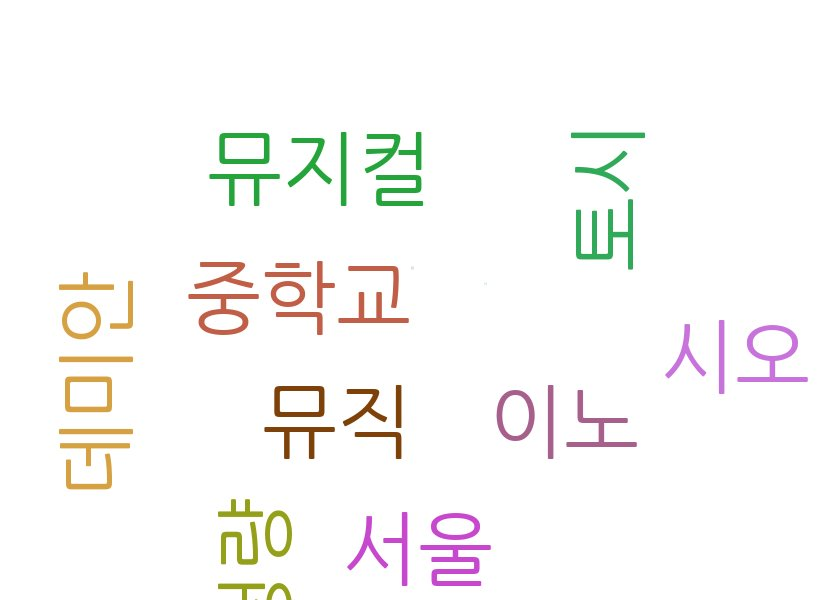

In [25]:
from IPython.display import Image
Image(filename='wordcloud.jpg')

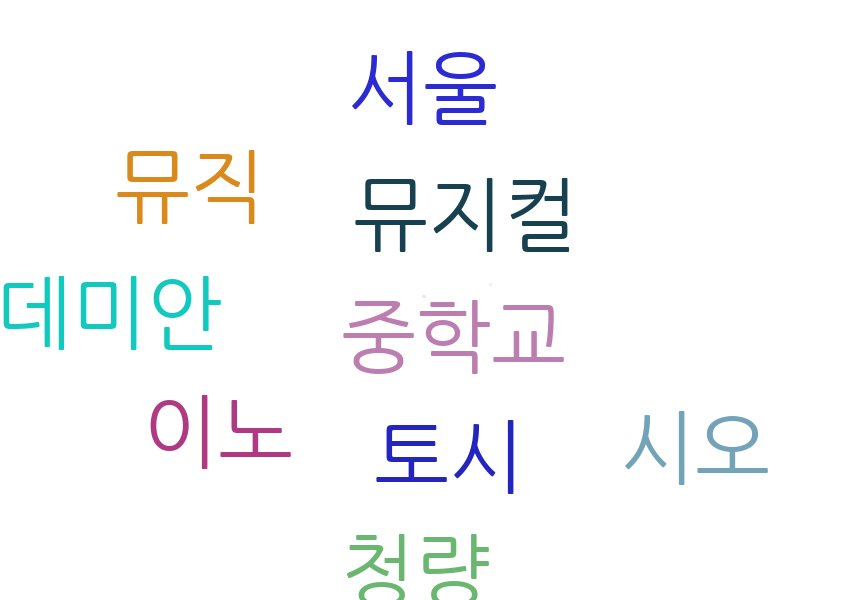

In [26]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(title_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'title_wordcloud.jpg', size=(900, 600), fontname='Nanum Gothic', rectangular=False)

Image(filename='title_wordcloud.jpg')

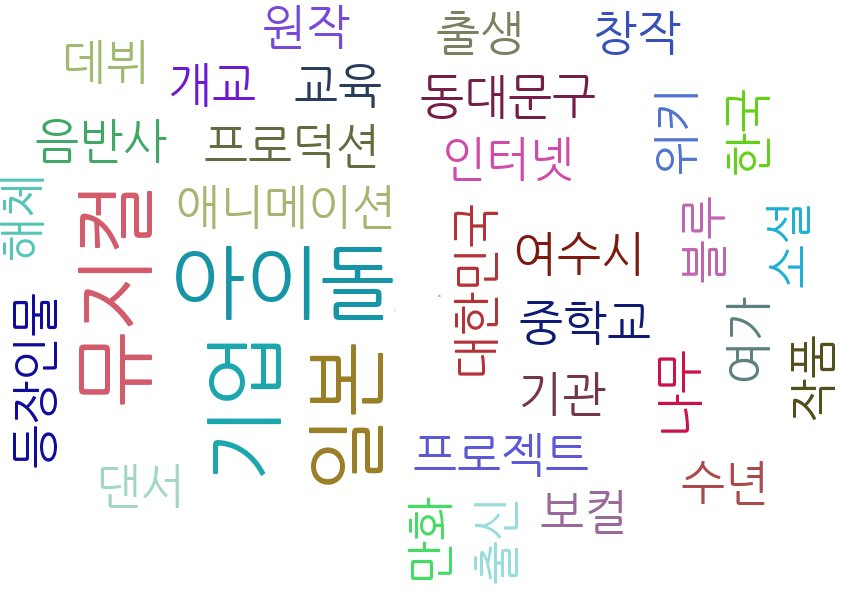

In [27]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(category_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'category_wordcloud.jpg', size=(900, 600), fontname='Nanum Gothic', rectangular=False)

Image(filename='category_wordcloud.jpg')